In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_web
from datetime import datetime
import yfinance as yf
yf.pdr_override()  # update pandas datareader (yahoo finance api)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# MacOS 0 - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =  False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore  Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TS - Statistics
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# TS - Deep learning
### Pytorch 관련 모듈 추가

# Reg - linear
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Reg - Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Reg - Distance based
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Reg - Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Reg - Deep Learning
from sklearn.neural_network import MLPRegressor

In [3]:
# Processing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#  Evaluation
from sklearn.metrics import mean_squared_error

# Feature selection
from  sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [4]:
# industry group
tickers_i = ['AAPL', 'TSLA', 'MSFT', 'META', 'AMZN']

# market
tickers_m = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLP', 'GLD', 'TLT', 'SHY']

#======================================================
## SPY :: S&P500
## QQQ :: NASDAQ
## DIA :: Dow Jones
## IWM :: Russell 2000
## XLP :: Goods (필수소비재)
## GLD :: Gold (달러 대체재)
## TLT :: US Bond - Long(20+ 미 장기채)
## SHY :: US Bond - Short(5- 미 단기채)

In [5]:
start_date = datetime(year=2010, month=1, day=2)
end_date = datetime(year=2022, month=12, day=31)

# indsutry group
df_i = pd_web.DataReader(tickers_i, start=start_date, end=end_date)

# market index
df_m = pd_web.DataReader(tickers_m, start=start_date, end=end_date)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  8 of 8 completed


In [6]:
display(df_i.head(3))
print(f"dates : {df_i.index[0]} ~ {df_i.index[-1]}")
print(f"stocks : {df_i['Adj Close'].columns.tolist()}")

Adj Close                                  Close               \
                AAPL    AMZN META       MSFT TSLA      AAPL    AMZN META   
Date                                                                       
2010-01-04  6.478999  6.6950  NaN  23.474920  NaN  7.643214  6.6950  NaN   
2010-01-05  6.490200  6.7345  NaN  23.482504  NaN  7.656429  6.7345  NaN   
2010-01-06  6.386964  6.6125  NaN  23.338392  NaN  7.534643  6.6125  NaN   

                            ...      Open                               \
                 MSFT TSLA  ...      AAPL    AMZN META       MSFT TSLA   
Date                        ...                                          
2010-01-04  30.950001  NaN  ...  7.622500  6.8125  NaN  30.620001  NaN   
2010-01-05  30.959999  NaN  ...  7.664286  6.6715  NaN  30.850000  NaN   
2010-01-06  30.770000  NaN  ...  7.656429  6.7300  NaN  30.879999  NaN   

               Volume                                 
                 AAPL       AMZN META      MSFT TSLA  
Date                                                  
2010-01-04  493729600  151998000  NaN  38409100  NaN  
2010-01-05  601904800  177038000  NaN  49749600  NaN  
2010-01-06  552160000  143576000  NaN  58182400  NaN  

[3 rows x 30 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['AAPL', 'AMZN', 'META', 'MSFT', 'TSLA']


In [7]:
display(df_m.head(3))
print(f"dates : {df_m.index[0]} ~ {df_m.index[-1]}")
print(f"stocks : {df_m['Adj Close'].columns.tolist()}")

Adj Close                                                          \
                  DIA         GLD        IWM        QQQ        SHY        SPY   
Date                                                                            
2010-01-04  77.608231  109.800003  52.841778  40.890106  72.165215  87.483177   
2010-01-05  77.483391  109.699997  52.660072  40.890106  72.252075  87.714775   
2010-01-06  77.534790  111.510002  52.610519  40.643448  72.260742  87.776550   

                                       Close              ...       Open  \
                  TLT        XLP         DIA         GLD  ...        TLT   
Date                                                      ...              
2010-01-04  61.923618  18.461494  105.660004  109.800003  ...  89.839996   
2010-01-05  62.323574  18.468414  105.489998  109.699997  ...  90.050003   
2010-01-06  61.489269  18.454575  105.559998  111.510002  ...  90.169998   

                        Volume                                         \
                  XLP      DIA       GLD       IWM       QQQ      SHY   
Date                                                                    
2010-01-04  26.450001  8977300  16224100  42863900  62822800  1220600   
2010-01-05  26.690001  6549200  14213100  55523100  62935600   598200   
2010-01-06  26.650000  6797200  24981900  59708600  96033000  1534900   

                                          
                  SPY      TLT       XLP  
Date                                      
2010-01-04  118944600  2829100   8465900  
2010-01-05  111579900  2841600  11805400  
2010-01-06  116074400  4099600   9267000  

[3 rows x 48 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['DIA', 'GLD', 'IWM', 'QQQ', 'SHY', 'SPY', 'TLT', 'XLP']


In [8]:
df_i['Adj Close']

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2010-01-04,6.478999,6.695000,NaN,23.474920,NaN
2010-01-05,6.490200,6.734500,NaN,23.482504,NaN
2010-01-06,6.386964,6.612500,NaN,23.338392,NaN
2010-01-07,6.375157,6.500000,NaN,23.095680,NaN
2010-01-08,6.417540,6.676000,NaN,23.254959,NaN
...,...,...,...,...,...
2022-12-23,131.127045,85.250000,118.040001,236.631805,123.150002
2022-12-27,129.307236,83.040001,116.879997,234.877380,109.099998
2022-12-28,125.339409,81.820000,115.620003,232.468719,112.709999


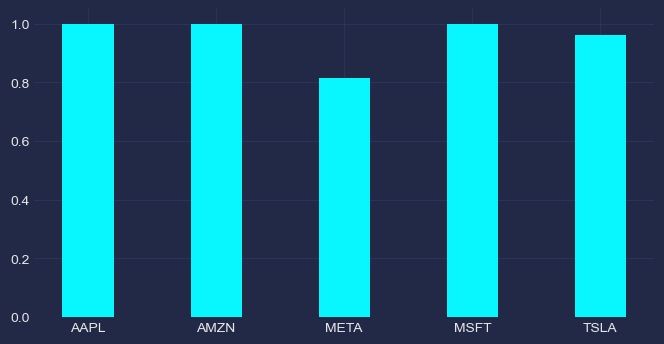

AAPL    1.000000
AMZN    1.000000
META    0.816932
MSFT    1.000000
TSLA    0.962714
dtype: float64


In [9]:
data = df_i['Adj Close'].notna().sum() / df_i['Adj Close'].shape[0]

plt.figure(figsize=(8,4))
plt.bar(x=data.index, height=data.values, width=0.4)
plt.show()

print(data)

In [10]:
# 시장 국면이 빠르게 달라지기 때문에 10년전꺼부터는 잘 안 쓴다

# 메타의 첫번째 na값
df_i['Adj Close']['META'].dropna()

Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2022-12-23    118.040001
2022-12-27    116.879997
2022-12-28    115.620003
2022-12-29    120.260002
2022-12-30    120.339996
Name: META, Length: 2673, dtype: float64

In [11]:
start_date_adj = df_i['Adj Close']['META'].dropna().head(1).index[0]

# Use Adj Close column only
df_i_adj = df_i.loc[start_date_adj:, 'Adj Close']
display(df_i_adj)

# Check NA
print(f"values(NA) : \n{df_i_adj.isna().sum()}")

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2012-05-18,16.056868,10.692500,38.230000,23.571968,1.837333
2012-05-21,16.992346,10.905500,34.029999,23.958527,1.918000
2012-05-22,16.861866,10.766500,31.000000,23.966583,2.053333
2012-05-23,17.273291,10.864000,32.000000,23.443121,2.068000
2012-05-24,17.114655,10.762000,33.029999,23.410906,2.018667
...,...,...,...,...,...
2022-12-23,131.127045,85.250000,118.040001,236.631805,123.150002
2022-12-27,129.307236,83.040001,116.879997,234.877380,109.099998
2022-12-28,125.339409,81.820000,115.620003,232.468719,112.709999


values(NA) : 
AAPL    0
AMZN    0
META    0
MSFT    0
TSLA    0
dtype: int64


In [12]:
# Apply the same for market index
df_m_adj = df_m.loc[start_date_adj:, 'Adj Close']
display(df_m_adj)

# Check NA
print(f"values(NA) : \n{df_i_adj.isna().sum()}")

,DIA,GLD,IWM,QQQ,SHY,SPY,TLT,XLP
Date,,,,,,,,
2012-05-18,96.299622,154.550003,63.545818,54.662346,74.795639,104.715950,93.641792,24.668678
2012-05-21,97.471024,154.649994,65.043198,56.190468,74.804482,106.515808,93.445770,24.764347
2012-05-22,97.486656,152.080002,64.651825,56.127560,74.777908,106.701447,92.405312,24.793785
2012-05-23,97.392967,151.619995,65.068726,56.235432,74.813354,106.757988,93.046219,24.727556
2012-05-24,97.713142,151.410004,65.204865,55.866859,74.786774,106.967819,92.691826,24.963055
...,...,...,...,...,...,...,...,...
2022-12-23,326.150269,167.259995,172.459625,266.195709,79.157425,378.706665,99.047546,73.793152
2022-12-27,326.582611,168.669998,171.302582,262.432190,79.050346,377.213226,97.089096,74.146515
2022-12-28,322.848724,167.910004,168.642349,258.967346,79.050346,372.525269,96.517082,73.223854


values(NA) : 
AAPL    0
AMZN    0
META    0
MSFT    0
TSLA    0
dtype: int64


<Axes: xlabel='Date'>

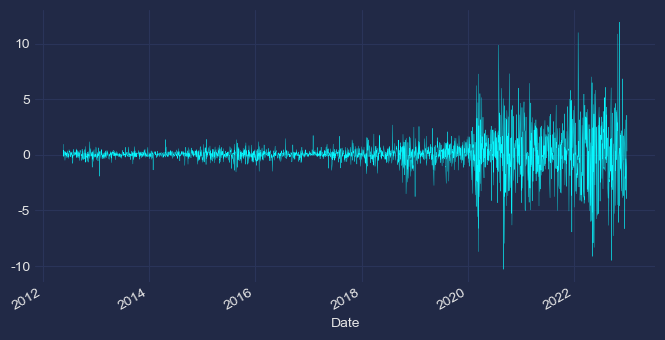

In [13]:
plt.figure(figsize=(8,4))
data = df_i_adj.diff(1)['AAPL']
data.plot(linewidth=0.25)

Text(0.5, 1.0, 'Monthly Std of Ret(~1)')

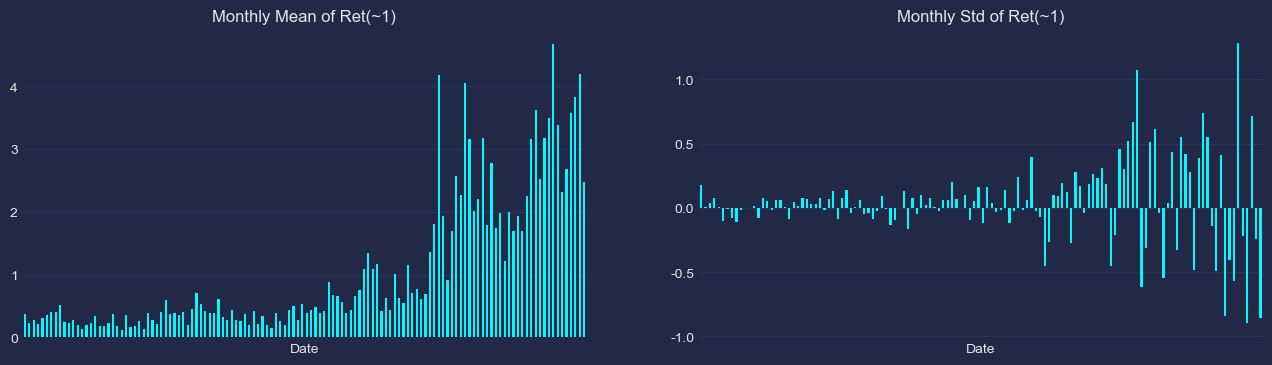

In [14]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Ret(~1)')
axes[1].set_title('Monthly Std of Ret(~1)')

<Axes: xlabel='Date'>

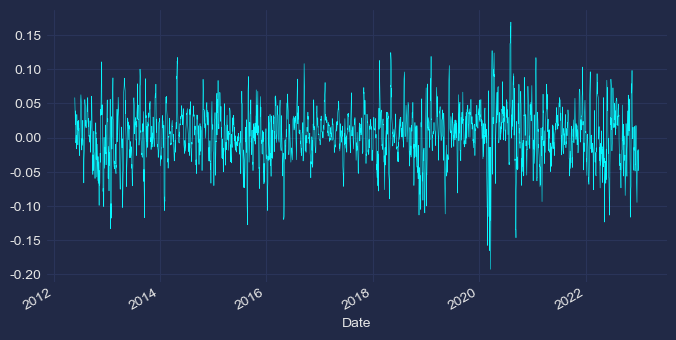

In [15]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(5)['AAPL']
data.plot(linewidth=0.4)

Text(0.5, 1.0, 'Monthly Std of Ret(~1)')

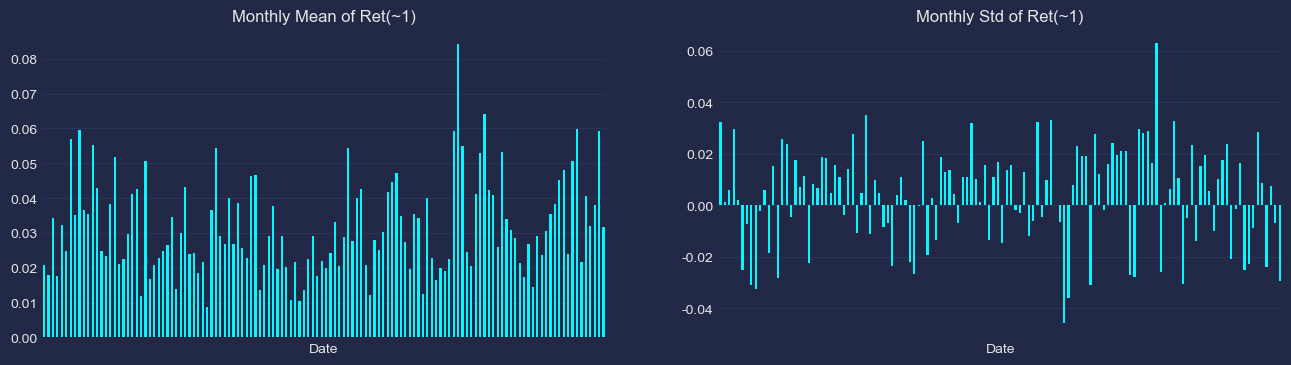

In [16]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Ret(~1)')
axes[1].set_title('Monthly Std of Ret(~1)')

In [17]:
# y (target to forecasting)
y = np.log(df_i_adj['AAPL']).diff(1).shift(-1)

# x (y-delayed)
y_delayed = pd.concat([np.log(df_i_adj['AAPL']).diff(x) for x in [5,20,60]], axis=1)
y_delayed.columns = ['AAPL_d5', 'AAAPL_d20', 'AAPL_d60']

# x (y-related)
X = np.log(df_i_adj).diff(1)
X.columns = [f"{x}_d1" for x in df_i_adj.columns]

df_Xy = pd.concat([X, y_delayed, y], axis=1).dropna()
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,AAPL_d5,AAAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,0.021497,0.044253,0.179090,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019024,0.030153,0.024837,0.039501,0.137506,0.018328
2012-08-17,0.018328,-0.001574,-0.042144,0.003891,-0.009617,0.041603,0.074274,0.131727,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005191,-0.016802,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,-0.019898,-0.116215,-0.075804,-0.013975
2022-12-27,-0.013975,-0.026266,-0.009876,-0.007442,-0.121138,-0.017836,-0.103575,-0.059279,-0.031166


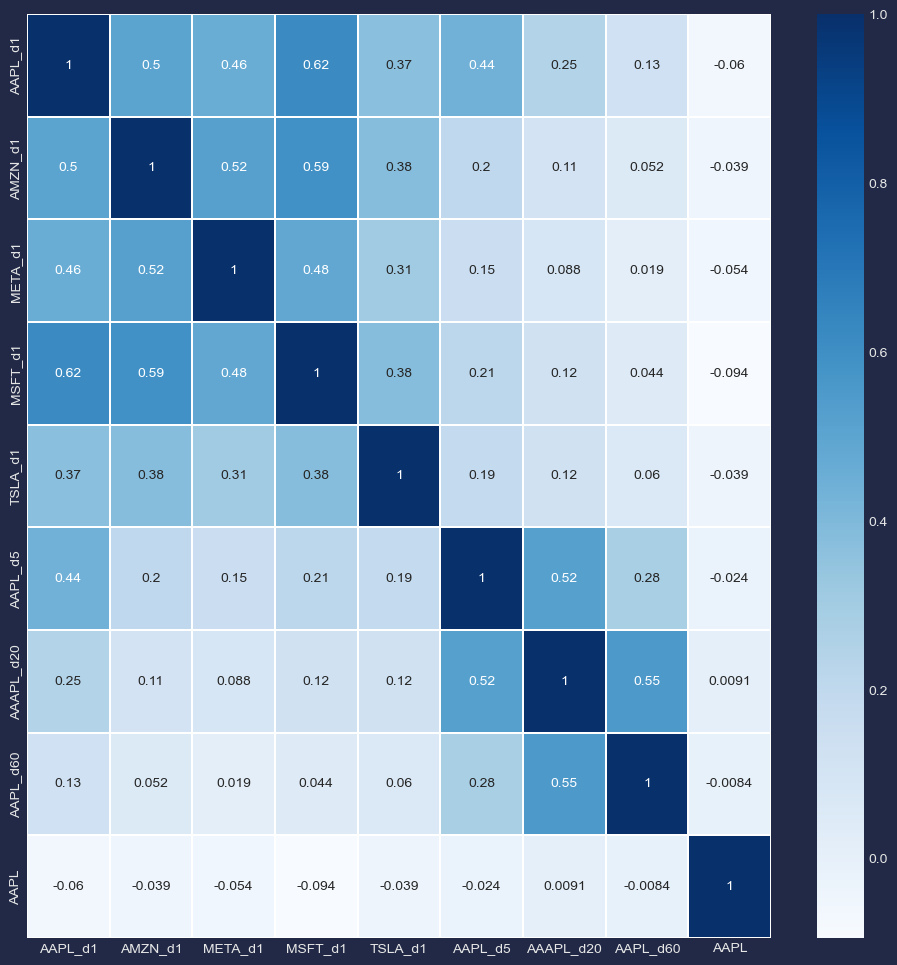

In [18]:
plt.figure(figsize=(12,12))

sns.heatmap(df_Xy.corr(), annot=True, cmap='Blues', linewidth=0.1)
plt.show()


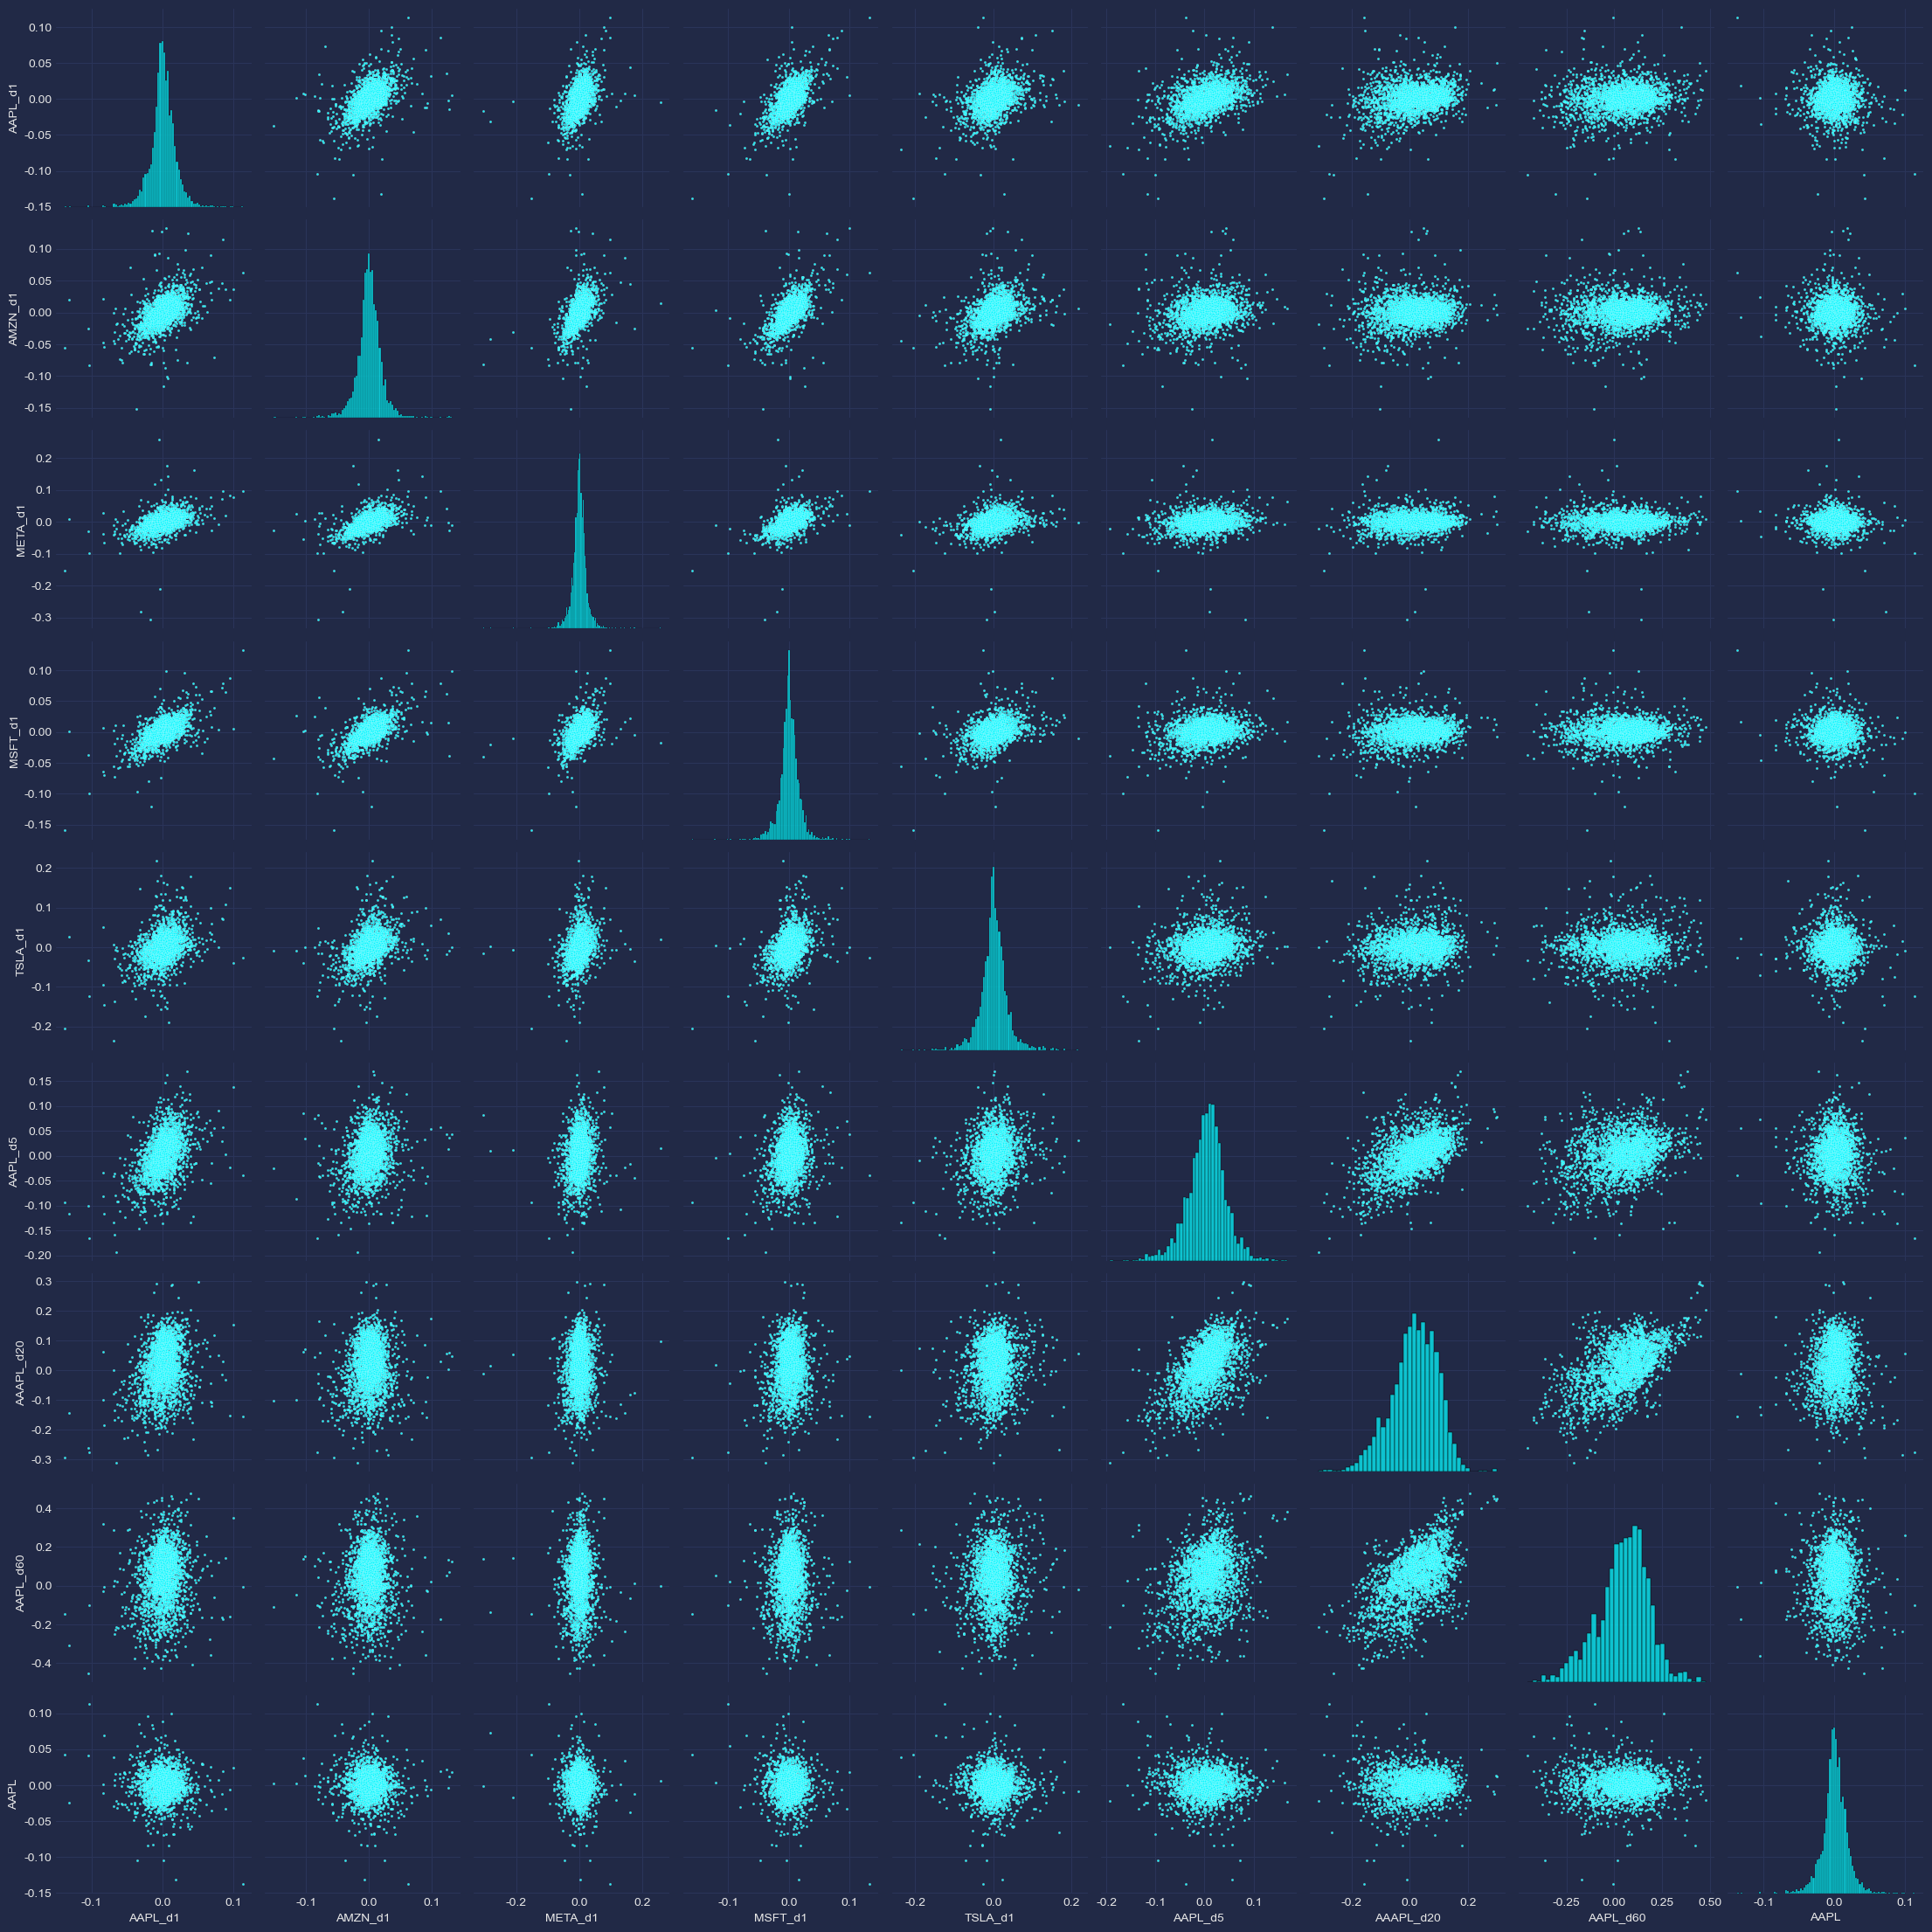

In [20]:
sns.pairplot(df_Xy, plot_kws={'s':3})
plt.show()